# Generative Adversarial Networks 
by Alexander Lercher

## Tensorflow Setup

In [1]:
import tensorflow as tf

# Execute this to avoid internal tf error
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Generator for Training Data 

In [2]:
# Simple Dataset (MNIST Handwritten Digits)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
# Normalize the image pixels to [-1, 1] according to paper
x_train = (x_train - 255/2.) / (255/2.) 

mnist_data = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(256)

def mnist_generator():
    return mnist_data

In [3]:
from training_images.training_data_provider import TrainingDataProvider
provider = TrainingDataProvider(
    training_data_locations=['training_images/lfw-deepfunneled'],
    image_height=256,
    image_width=256
    )

provider.prepare_image_arrays_from_disk()
# provider.store_image_arrays_to_disk()
facial_image_generator = provider.get_all_training_images_in_batches_from_array_on_disk

## Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
Alec Radford, Luke Metz, Soumith Chintala

https://arxiv.org/abs/1511.06434

In [3]:
from gan import DCGAN_MNIST

gan = DCGAN_MNIST()

gan.set_training_data(mnist_generator)

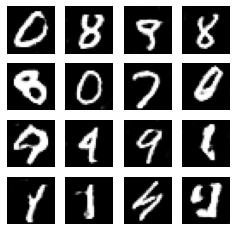

In [4]:
gan.train(epochs=50)

In [8]:
gan.generate_gif()
gan.export()

## High-Resolution Deep Convolutional Generative Adversarial Networks
J. D. Curtó, I. C. Zarza, Fernando de la Torre, Irwin King, Michael R. Lyu

https://arxiv.org/abs/1711.06491

In [3]:
from gan import HR_DCGAN

gan = HR_DCGAN()

gan.set_training_data(facial_image_generator)

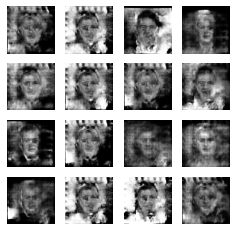

In [4]:
gan.train(epochs=150)

In [5]:
gan.generate_gif()
gan.export()

## Visualization and Debug Output

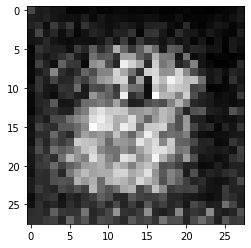

In [12]:
import matplotlib.pyplot as plt

img = gan.generate()
plt.imshow((img[0, :,:,0] ), cmap='gray')
plt.show()

In [16]:
import numpy as np
noise = np.random.normal(0, 1, (5, 100))
batch_fake = gan.generator.predict(noise)

res = gan.discriminator.predict(batch_fake)
res

array([[1.2020396e-10],
       [2.3298000e-13],
       [3.5340523e-08],
       [9.8144054e-12],
       [3.0255128e-11]], dtype=float32)

In [17]:
res = gan.discriminator.predict(x_train[0:5])
res

array([[2.6724434e-13],
       [1.1788068e-12],
       [9.7747017e-13],
       [1.4346446e-13],
       [4.3671585e-13]], dtype=float32)